**Introduction**
This goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis. We can explore the following:

Are certain types of species more likely to be endangered?
How is the observation analysis look compared to endangerment?
How are the species spread amongst the parks?

Both Observations.csv and Species_info.csv was provided by Codecademy.com.

Note: *The data for this project is inspired by real data, but is mostly fictional.*

### Project Goals

Imformation on the different at-risk species can help the National Park Service to maintian biodiversity. We will be exploring what is provided in the two dataframes to find any conclusions that could be meaninful to this cause.

### Data

This project has two data sets that came with the package:
- One `csv` file has information about each species
- Another has observations of animals with park locations.

This data will be used to fulfill the project requirements.

### Evaluation

After our analysis, we will revisit what we've learned and how it pertains to our goals. We will declare what has been answered, what could not, how we can use this information, and future experiments to futher our goals.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

ob_df = pd.read_csv("observations.csv")
print(ob_df.head())
sp_df = pd.read_csv("species_info.csv")
print(sp_df.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic 

In [2]:
print(ob_df.describe())
print(sp_df.describe())
print(ob_df.isna().sum())
print(sp_df.isna().sum())

       observations
count  23296.000000
mean     142.287904
std       69.890532
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000
              category    scientific_name        common_names  \
count             5824               5824                5824   
unique               7               5541                5504   
top     Vascular Plant  Castor canadensis  Brachythecium Moss   
freq              4470                  3                   7   

       conservation_status  
count                  191  
unique                   4  
top     Species of Concern  
freq                   161  
scientific_name    0
park_name          0
observations       0
dtype: int64
category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64


The scope of this project is to find any patterns to endangered species. My current goal is to get the CVS data into a readable, clean data frame. Our first challenge is investgating our N/A values. Second challenge is our species table has 5824 unique scientific names but 23296 on the observation table. We need the data about the species to be joined and mapped to our observations for proper data storage methodology. The only missing data is under the conservation_status so we can predict this to be **MNAR** (missing not at random)

In [3]:
missing_data = sp_df[sp_df['conservation_status'].isna()]
conserv_data = sp_df[sp_df['conservation_status'].notna()]
print(missing_data.describe())
print(conserv_data.describe())

              category        scientific_name        common_names  \
count             5633                   5633                5633   
unique               7                   5363                5324   
top     Vascular Plant  Streptopelia decaocto  Brachythecium Moss   
freq              4424                      3                   7   

       conservation_status  
count                    0  
unique                   0  
top                    NaN  
freq                   NaN  
       category   scientific_name     common_names conservation_status
count       191               191              191                 191
unique        7               179              190                   4
top        Bird  Myotis lucifugus  Gray Wolf, Wolf  Species of Concern
freq         79                 3                2                 161


conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64


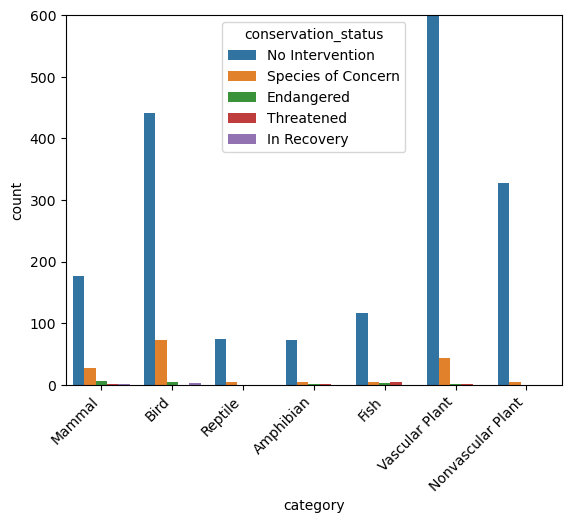

<Figure size 640x480 with 0 Axes>

In [4]:
# After seperating the data into with and without a conservation status, we can quickly see:
# 1) Bird is the most common category, 
# 2) Myotis lucifugus comes up 3 times, 
# 3) And there are 2 Gray Wolves in conservation status
# Let's replace these nan values with 'No Intervention' and compare
sp_df['conservation_status'] = sp_df['conservation_status'].fillna('No Intervention')
print(sp_df.groupby("conservation_status").size())
sns.countplot(data=sp_df, x='category', hue='conservation_status')
plt.xticks(rotation=45, ha='right')
# We have an outlier so we need to zoom in on the graph
plt.ylim(0, 600)
plt.show()
plt.clf()

In [5]:
# There is a overwhelmingly disproportion of data sets under the vascular plant category and are not in conservation status
# Let's invesigate this subet of data
df_vascular = sp_df[sp_df['category'] == 'Vascular Plant']
print(df_vascular.describe())

              category       scientific_name common_names conservation_status
count             4470                  4470         4470                4470
unique               1                  4262         4291                   4
top     Vascular Plant  Hypochaeris radicata  Panic Grass     No Intervention
freq              4470                     3            6                4424


In [6]:
# It's hard to say how it is affecting the dataset
# I will add another column 'is_vascular_plant' to always be able to compare results with and without the data set
sp_df['is_vascular_plant'] = sp_df['category'] == 'Vascular Plant'
print(sp_df.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  \
0                           Gapper's Red-Backed Vole     No Intervention   
1                              American Bison, Bison     No Intervention   
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...     No Intervention   
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)     No Intervention   
4                                      Wapiti Or Elk     No Intervention   

   is_vascular_plant  
0              False  
1              False  
2              False  
3              False  
4              False  


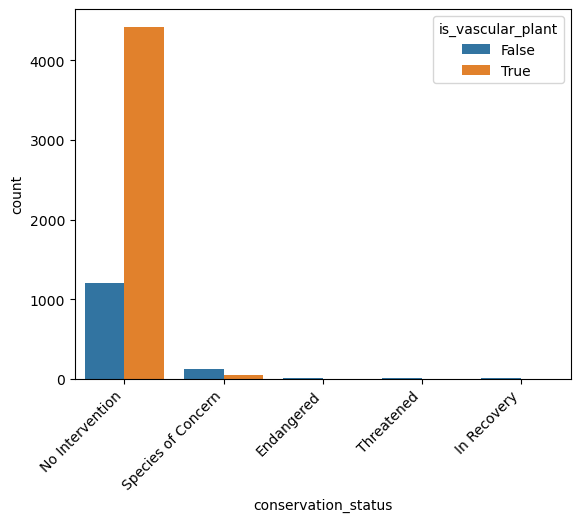

<Figure size 640x480 with 0 Axes>

In [7]:
sns.countplot(data=sp_df, x='conservation_status', hue='is_vascular_plant')
plt.xticks(rotation=45, ha='right')
plt.show()
plt.clf()

In [8]:
# I'm curious of any duplicate rows
print(ob_df.duplicated().sum())
print(sp_df.duplicated().sum())

15
0


In [9]:
# 15 in observations, which can be dealt with, and none in species
duplicates = ob_df[ob_df.duplicated(keep=False)]
print(duplicates)

              scientific_name                            park_name  \
365            Plantago major  Great Smoky Mountains National Park   
513             Arctium minus               Yosemite National Park   
627        Spilogale putorius            Yellowstone National Park   
1020     Eleocharis palustris  Great Smoky Mountains National Park   
1032      Hesperis matronalis                  Bryce National Park   
1454   Echinochloa crus-galli  Great Smoky Mountains National Park   
1635    Streptopelia decaocto            Yellowstone National Park   
4178     Monotropa hypopithys  Great Smoky Mountains National Park   
4527   Botrychium virginianum            Yellowstone National Park   
7219        Prunella vulgaris  Great Smoky Mountains National Park   
7263   Echinochloa crus-galli  Great Smoky Mountains National Park   
8710    Streptopelia decaocto            Yellowstone National Park   
10038          Plantago major  Great Smoky Mountains National Park   
10674           Arct

In [10]:
# Looks redundant, so we will drop the duplicates
ob_df = ob_df.drop_duplicates()
print(ob_df.duplicated().sum())

0


In [11]:
# Lets get a cross table of all the categories and conservation status. 
# We'll include it in percentages as well
cross_tab_cons = pd.crosstab(
    sp_df['category'],
    sp_df['conservation_status']
)
print(cross_tab_cons)
cross_tab_cons_perc = pd.crosstab(
    sp_df['category'],
    sp_df['conservation_status'],
    normalize='index'
) * 100
print(cross_tab_cons_perc)

conservation_status  Endangered  In Recovery  No Intervention  \
category                                                        
Amphibian                     1            0               73   
Bird                          4            3              442   
Fish                          3            0              116   
Mammal                        7            1              176   
Nonvascular Plant             0            0              328   
Reptile                       0            0               74   
Vascular Plant                1            0             4424   

conservation_status  Species of Concern  Threatened  
category                                             
Amphibian                             4           2  
Bird                                 72           0  
Fish                                  4           4  
Mammal                               28           2  
Nonvascular Plant                     5           0  
Reptile                             

Reviewing the crosstables, we can make some observations. Mammals and birds are the least in No Intervention status at 82.2% and 84.8%, respectively.

Plants are doing just fine, especially Vascular plants. They are both 98-99% No Intervention status.

Mammals have the most Endagnered status at 3.2%, followed by Fish at 2.4%.

Speaking of Fish, along with Amphibians they are the most Threatened by far at 3.1% and 2.5%, respectively. 
**We could hypothesize here that water biomes have been disadvanaged in some way to place these animals in Threatened status.**

No surprise Mammals and Birds are the highest among Species of Concern at 13%, which is very high compared to the next closest category, Reptile at 6%.

The In Recovery status is the smallest portion of the dataset with only Birds an Mammals listed at 0.6% and 0.5%, respectively. 
**This could suggest Mammals and Birds, being the most in conservation status, are already being addressed and are experincing a rebound in numbers.**

Next is to investigate what type of animals under the common name column are in protected status. The data needs to be cleaned into a list of words.

In [12]:
import string
from itertools import chain
from collections import Counter

# The data needs to be sorted into only protected animals
protected = sp_df[sp_df['conservation_status'] != 'No Intervention']

def remove_punctuation(text):
    if pd.isna(text): # First, the function replaces NaN values with a blank string.
        return ''
    for p in string.punctuation:
        text = text.replace(p,'') # Next, it reolaces all punctuation with a blank string.
    return text
token_list = (
    protected['common_names']
    .apply(remove_punctuation)
    .str.split() # Now that the list has been cleaned, it is split at every word.
    .tolist()
)
unique_token_list = [list(dict.fromkeys(tokens)) for tokens in token_list]
all_words = list(chain.from_iterable(unique_token_list))
counts = Counter(all_words)
count_df = pd.DataFrame(counts.most_common(30), columns=['Word', 'Count'])
print(count_df)

          Word  Count
0       Myotis     15
1          Bat     12
2        Brown      7
3     Northern      6
4     American      6
5     Mountain      6
6   California      5
7      Western      5
8         Gray      4
9         Wolf      4
10        Hawk      4
11      Common      4
12     Sparrow      4
13      Sierra      4
14      Nevada      4
15         Red      3
16      Little      3
17   LongEared      3
18    Carolina      3
19      Falcon      3
20        Blue      3
21     Swallow      3
22     Warbler      3
23  Flycatcher      3
24  Woodpecker      3
25       Snake      3
26      Darter      3
27       Grass      3
28        Frog      3
29         Big      2


Myotis is a type of bat, which means Bats are easily the most protected species. The next applicable word for an animal is Wolf at a 4 count, which is 3 to 4 times less than Bats. We will continue looking into Bats for now.

In [13]:
bat_matches = sp_df[
    sp_df['common_names']
        .str.contains(r'\bMyotis\b|\bBat\b', case=False, na=False)
]
print(bat_matches[['scientific_name', 'common_names']].info())

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, 28 to 4468
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  34 non-null     object
 1   common_names     34 non-null     object
dtypes: object(2)
memory usage: 816.0+ bytes
None


In [14]:
# I'm going to join the data frames now, but instead of the full dataset, I will only use our Bat data frame. 
# Observations will be our left df and we will populate species using scientific_name as the key
full_df = pd.merge(ob_df, bat_matches, on='scientific_name', how='left')
print(full_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23353 entries, 0 to 23352
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      23353 non-null  object
 1   park_name            23353 non-null  object
 2   observations         23353 non-null  int64 
 3   category             208 non-null    object
 4   common_names         208 non-null    object
 5   conservation_status  208 non-null    object
 6   is_vascular_plant    208 non-null    object
dtypes: int64(1), object(6)
memory usage: 1.2+ MB
None


In [15]:
# Now the data will be fitered to only bat data again
full_bat_df = full_df.dropna(subset=['category', 'common_names'])
print(full_bat_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 208 entries, 260 to 23261
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      208 non-null    object
 1   park_name            208 non-null    object
 2   observations         208 non-null    int64 
 3   category             208 non-null    object
 4   common_names         208 non-null    object
 5   conservation_status  208 non-null    object
 6   is_vascular_plant    208 non-null    object
dtypes: int64(1), object(6)
memory usage: 13.0+ KB
None


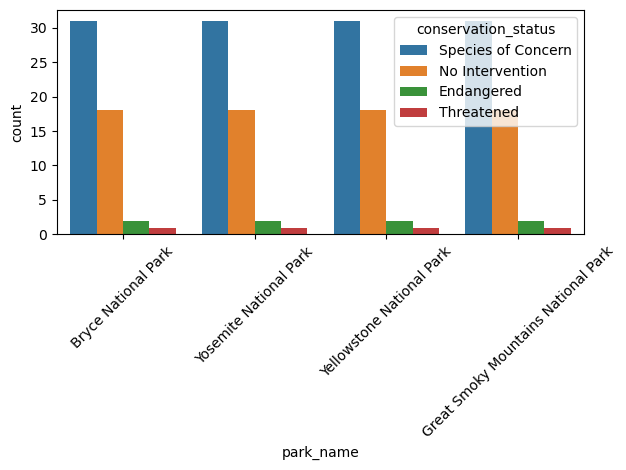

In [16]:
# There are 208 observations of bats across the dataset.
sns.countplot(
    data=full_bat_df,
    x='park_name',
    hue='conservation_status'
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The graph displays all the information necessary to conclude the pattern of bats and their conservation status across the parks.

Across all four parks, bat show a consistent pattern in sightings with no major differences. 'Species of Concern' and 'No Intervention' make up the majority of observations. 'Endagnered' and 'Threatened' are present in very small numbers, equally. 

This implies conservation pressures on Bats are systemic rather than specific to one park. More bats are protected as a 'Species of Concern' than 'No intervention', meaning there are less unprotected Bats than not, but the "endagnered' and 'Threatened' make up a small portion. This could mean Bats are well protected and those with the most danger can be focused on. 

## Conclusions

The project was able to make several data visualizations and inferences about the various species in four of the National Parks from this this data set.

This project was also able to answer some of the questions first posed in the beginning:

- Are certain types of species more likely to be endangered? 
    - Mammals and Birds had the highest percentage of being protected. Bats were most common.
- How is the observation analysis look compared to endangerment?
    - Observations across the park were uniform suggesting the location does not affect the data. 
- How are the species spread amongst the parks? 
    - Few observations of 'Threatened" and "Endangered" bats, but more Bats are in protected status than not. This suggests while most Bats are protected, the few in most danger can recieve more focus and attention.

## Further Research 

This dataset only included observations from the last 7 days. A data set spanning over months or years could yeild more insights. If efforts to conservation could be recorded numerically, like Dollars spent or manpower, those could be compared to the data set as well for more insight. We also have no access to why these animals got to protected status, e.i. shrinking habitats, polution, climate change, etc. If the root cause of srhinking numbers could be quantified, that could be interesting research.